# K-Means Clustering  
K-Means clustering merupakan salah satu metode dalam unsupervised learning yang digunakan untuk mengelompokkan data ke dalam beberapa kelompok (cluster) berdasarkan kesamaan karakteristik atau fitur. Tujuan utamanya adalah untuk membagi data ke dalam K kelompok yang saling terpisah, dimana dalam kelompok data bersifat homogen dan antar kelompok data bersifat heterogen.  

## Langkah-langkah algoritma K-Means :  
1. Menentukan jumlah kluster sebanyak $K$  
* Artinya menentukan berapa banyak kelompok/kluster yang ingin dibuat dari data. Misalnya $K$ = 3 maka membagi data menjadi 3 kluster. 
* Pemilihan nilai $K$ dapat menggunakan metode seperti Elbow Method untuk membantu menentukan $K$ yang optimal.   
2. Memilih K centroid awal secara acak  
* Artinya menentukan titik awal (centroid) sebagai pusat dari masing-masing kluster.  
* Centroid bisa dipilih secara acak dari data yang ada atau menggunakan teknik seperti K-Means++ dimana dijalankan secara otomatis pada scikit-learn untuk hasil centroid yang lebih baik.  
3. Menghitung jarak setiap data ke tiap centroid  
* Artinya menentukan seberapa dekat setiap data ke setiap centroid.
* Umumnya menggunakan Euclidian distance.
4. Mengelompokkan data berdasarkan centroid terdekat  
* Artinya mengklasifikasikan setiap data ke dalam salah satu dari $K$ kluster.  
* Setiap data ditempatkan ke kluster yang pusatnya (centroid-nya) paling dekat dengannya. Jadi, tiap data hanya masuk ke satu kluster. 
5. Menghitung rata-rata dari anggota kluster, untuk menemukan centroid baru
* Menentukan pusat kluster baru berdasarkan data yang saat ini berada dalam kluster tersebut.  
* Centroid baru adalah rata-rata dari semua data di dalam suatu kluster. 
6. Mengulang langkah nomor 3-5 sampai data pada setiap kluster tidak berubah signifikan.  
* Iterasi dilakukan sampai tidak ada lagi data yang berpindah kluster, atau perubahan posisi centroid sangat kecil.  

## Evaluasi Hasil K-Means  
1. Inertia (Sum Square Error/SSE)  
Inertia mengukur sejauh mana titik data dalam suatu cluster tersebar dari pusat cluster tersebut. Semakin kecil nilai inertia, klaster semakin baik.  

$$Inertia= \sum_{i=1}^{n} \left\| x_i - \mu_{c_i} \right\|^2$$  

**Keterangan** :   
$x_i$ : Titik data ke-$i$  
$\mu_{c_i}$ : Centroid dari cluster tempat $x_i$ berada  

* Nilai inertia (sangat kecil/mendekati 0) : Klaster sangat kompak dan semua titik dekat dengan centroidnya (**sangat baik**).  
* Nilai inertia (kecil-sedang) : Klaster cukup baik dan dapat diterima dalam banyak kasus.  
* Nilai inertia (besar) : Klaster tidak rapat,  data menyebar jauh dari centroid → bisa jadi jumlah klaster (k) kurang tepat atau K-Means tidak cocok digunakan.



2. Silhouette Method : Sebuah metode yang mengukur tingkat kemiripan suatu point dengan clusternya dibandingkan dengan kluster lain.  

* untuk setiap titik $i$, silhouette ($i$) dihitung sebagai :   

$$s(i) = \frac{b(i) - a(i)}{\max\{a(i), b(i)\}}$$  

**Keterangan** :  
$a(i)$ : rata-rata jarak titik $i$ ke semua titik lain dalam klaster yang sama.  
$b(i)$ : rata-rata jarak titik $i$ ke semua titik dalam klaster terdekat (tetangga).

* Nilai silhouette mendekati angka 1 artinya suatu data berada pada cluster yang benar dengan jarak jauh dari cluster lain. 
* Nilai silhouette negatif artinya data tersebut lebih baik berada di kluster lain daripada kluster saat ini.
* Nilai silhouette = 0, artinya data tersebut di perbatasan antara dua cluster.  



## Komputasi K-Means Data IRIS

###  2 Klaster

In [1]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import silhouette_score, accuracy_score, confusion_matrix
import pandas as pd

# Baca data fitur dan label
df_features = pd.read_excel("data_iris.xlsx")
df_class = pd.read_excel("class.xlsx")  # kolom 'class'

df = df_features.copy()
df['class'] = df_class['class']

# Ambil fitur untuk clustering
features = df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]

# Normalisasi fitur(MinMax)
scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(features)

# KMeans clustering
K = 2
kmeans = KMeans(n_clusters=K, max_iter=300, tol=0.0001, random_state=42, n_init='auto')
kmeans.fit(scaled_features)

df['cluster'] = kmeans.labels_

print(f"Jumlah iterasi sampai konvergen: {kmeans.n_iter_}")
print(f"Inertia (SSE): {kmeans.inertia_:.4f}")
sil_score = silhouette_score(scaled_features, kmeans.labels_)
print(f"Silhouette Score: {sil_score:.4f}")

# Mapping cluster ke class mayoritas
mapping = (
    df.groupby('cluster')['class']
    .agg(lambda x: x.mode()[0])
    .to_dict()
)
df['predicted_class'] = df['cluster'].map(mapping)

# Evaluasi
y_true = df['class']
y_pred = df['predicted_class']

acc = accuracy_score(y_true, y_pred)
print(f"\nAkurasi keseluruhan clustering terhadap label asli: {acc:.4%}")

# Distribusi cluster per kelas (untuk insight)
dist = pd.crosstab(df['class'], df['cluster'], rownames=['Class'], colnames=['Cluster'])
print("\nDistribusi cluster per kelas:")
print(dist)

# Simpan hasil ke Excel
df.to_excel("hasil2.xlsx", index=False)

# Kalau ingin tampil semua baris (hati-hati jika data sangat banyak)
pd.set_option('display.max_rows', None)
print(df[['class', 'cluster', 'predicted_class']])



Jumlah iterasi sampai konvergen: 4
Inertia (SSE): 12.1437
Silhouette Score: 0.6295

Akurasi keseluruhan clustering terhadap label asli: 66.6667%

Distribusi cluster per kelas:
Cluster           0   1
Class                  
Iris-setosa       0  50
Iris-versicolor  50   0
Iris-virginica   50   0
               class  cluster  predicted_class
0        Iris-setosa        1      Iris-setosa
1        Iris-setosa        1      Iris-setosa
2        Iris-setosa        1      Iris-setosa
3        Iris-setosa        1      Iris-setosa
4        Iris-setosa        1      Iris-setosa
5        Iris-setosa        1      Iris-setosa
6        Iris-setosa        1      Iris-setosa
7        Iris-setosa        1      Iris-setosa
8        Iris-setosa        1      Iris-setosa
9        Iris-setosa        1      Iris-setosa
10       Iris-setosa        1      Iris-setosa
11       Iris-setosa        1      Iris-setosa
12       Iris-setosa        1      Iris-setosa
13       Iris-setosa        1      Iris-setosa

###  3 Klaster

In [4]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import silhouette_score, accuracy_score, confusion_matrix
import pandas as pd

# Baca data fitur dan label
df_features = pd.read_excel("data_iris.xlsx")
df_class    = pd.read_excel("class.xlsx")  # kolom 'class'

df = df_features.copy()
df['class'] = df_class['class']

# Ambil fitur untuk clustering
features = df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]

# Normalisasi fitur (MinMax)
scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(features)

# KMeans clustering
K = 3
kmeans = KMeans(
    n_clusters=K,
    max_iter=300,
    tol=0.0001,
    random_state=42,
    n_init='auto'  # ganti ke 10 jika sklearn <1.4
)
kmeans.fit(scaled_features)
df['cluster'] = kmeans.labels_

# Cetak metrik clustering
print(f"Jumlah iterasi sampai konvergen: {kmeans.n_iter_}")
print(f"Inertia (SSE): {kmeans.inertia_:.4f}")
sil_score = silhouette_score(scaled_features, kmeans.labels_)
print(f"Silhouette Score: {sil_score:.4f}")

# Mapping cluster ke class mayoritas
mapping = (
    df.groupby('cluster')['class']
      .agg(lambda x: x.mode()[0])
      .to_dict()
)
df['predicted_class'] = df['cluster'].map(mapping)

# Siapkan untuk evaluasi
y_true   = df['class']
y_pred   = df['predicted_class']
classes  = sorted(df['class'].unique())
cm       = confusion_matrix(y_true, y_pred, labels=classes)

# Akurasi keseluruhan
acc = accuracy_score(y_true, y_pred)
print(f"\nAkurasi keseluruhan clustering terhadap label asli: {acc:.4%}")

# Persentase error per kelas
error_per_class = {}
for i, c in enumerate(classes):
    total   = cm[i].sum()
    correct = cm[i, i]
    error   = 1 - correct/total if total > 0 else 0
    error_per_class[c] = error

print("\nPersentase kesalahan per kelas:")
for c, e in error_per_class.items():
    print(f" - {c}: {e:.2%}")

# Distribusi cluster per kelas (insight)
dist = pd.crosstab(df['class'], df['cluster'], 
                   rownames=['Class'], colnames=['Cluster'])
print("\nDistribusi cluster per kelas:")
print(dist)

# Simpan hasil lengkap ke Excel
df.to_excel("hasil_clustering_dengan_class_lengkap.xlsx", index=False)

# Tampilkan perbandingan class vs cluster vs predicted_class
pd.set_option('display.max_rows', None)
print("\nPerbandingan lengkap:")
print(df[['class', 'cluster', 'predicted_class']])

Jumlah iterasi sampai konvergen: 3
Inertia (SSE): 7.1386
Silhouette Score: 0.4825

Akurasi keseluruhan clustering terhadap label asli: 88.0000%

Persentase kesalahan per kelas:
 - Iris-setosa: 0.00%
 - Iris-versicolor: 20.00%
 - Iris-virginica: 16.00%

Distribusi cluster per kelas:
Cluster           0   1   2
Class                      
Iris-setosa       0  50   0
Iris-versicolor  10   0  40
Iris-virginica   42   0   8

Perbandingan lengkap:
               class  cluster  predicted_class
0        Iris-setosa        1      Iris-setosa
1        Iris-setosa        1      Iris-setosa
2        Iris-setosa        1      Iris-setosa
3        Iris-setosa        1      Iris-setosa
4        Iris-setosa        1      Iris-setosa
5        Iris-setosa        1      Iris-setosa
6        Iris-setosa        1      Iris-setosa
7        Iris-setosa        1      Iris-setosa
8        Iris-setosa        1      Iris-setosa
9        Iris-setosa        1      Iris-setosa
10       Iris-setosa        1      Ir

### 4 Klaster

In [5]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import silhouette_score, accuracy_score, confusion_matrix
import pandas as pd

# Baca data fitur dan label
df_features = pd.read_excel("data_iris.xlsx")
df_class = pd.read_excel("class.xlsx")  # kolom 'class'

df = df_features.copy()
df['class'] = df_class['class']

# Ambil fitur untuk clustering
features = df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]

# Normalisasi fitur(MinMax)
scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(features)

# KMeans clustering
K = 4
kmeans = KMeans(n_clusters=K, max_iter=300, tol=0.0001, random_state=42, n_init='auto')
kmeans.fit(scaled_features)

df['cluster'] = kmeans.labels_

print(f"Jumlah iterasi sampai konvergen: {kmeans.n_iter_}")
print(f"Inertia (SSE): {kmeans.inertia_:.4f}")
sil_score = silhouette_score(scaled_features, kmeans.labels_)
print(f"Silhouette Score: {sil_score:.4f}")

# Mapping cluster ke class mayoritas
mapping = (
    df.groupby('cluster')['class']
    .agg(lambda x: x.mode()[0])
    .to_dict()
)
df['predicted_class'] = df['cluster'].map(mapping)

# Evaluasi
y_true = df['class']
y_pred = df['predicted_class']

acc = accuracy_score(y_true, y_pred)
print(f"\nAkurasi keseluruhan clustering terhadap label asli: {acc:.4%}")

# Distribusi cluster per kelas (untuk insight)
dist = pd.crosstab(df['class'], df['cluster'], rownames=['Class'], colnames=['Cluster'])
print("\nDistribusi cluster per kelas:")
print(dist)

# Simpan hasil ke Excel
df.to_excel("hasil4.xlsx", index=False)

# Kalau ingin tampil semua baris (hati-hati jika data sangat banyak)
pd.set_option('display.max_rows', None)
print(df[['class', 'cluster', 'predicted_class']])



Jumlah iterasi sampai konvergen: 6
Inertia (SSE): 5.5417
Silhouette Score: 0.4435

Akurasi keseluruhan clustering terhadap label asli: 84.6667%

Distribusi cluster per kelas:
Cluster           0   1   2   3
Class                          
Iris-setosa       0  50   0   0
Iris-versicolor  21   0  29   0
Iris-virginica   21   0   2  27
               class  cluster  predicted_class
0        Iris-setosa        1      Iris-setosa
1        Iris-setosa        1      Iris-setosa
2        Iris-setosa        1      Iris-setosa
3        Iris-setosa        1      Iris-setosa
4        Iris-setosa        1      Iris-setosa
5        Iris-setosa        1      Iris-setosa
6        Iris-setosa        1      Iris-setosa
7        Iris-setosa        1      Iris-setosa
8        Iris-setosa        1      Iris-setosa
9        Iris-setosa        1      Iris-setosa
10       Iris-setosa        1      Iris-setosa
11       Iris-setosa        1      Iris-setosa
12       Iris-setosa        1      Iris-setosa
13     

Kesimpulan :  
1. K = 2   
Inertia (SSE): 12.1437  
Silhouette Score: 0.6295

* Nilai skor inertia lebih besar dari yang lain dan nilai skor silhouette yang diperoleh adalah yang tertinggi dibandingkan dengan K lainnya (lebih mendekati 1).

2. K = 3  
Inertia (SSE): 7.1386  
Silhouette Score: 0.4825 

* Nilai skor inertia turun dan nilai skor silhouette juga mengalami penurunan dibandingkan dengan k=2 (menjauh dari 1).

3. K =4  
Inertia (SSE): 5.5417  
Silhouette Score: 0.4435

* Nilai skor inertia dan nilai skor silhouette sama-sama mengalami penurunan (semakin jauh dari 1).  

Maka berdasarkan hasil evaluasi yang telah dilakukan, nilai K = 2 merupakan jumlah klaster yang paling optimal. Hal ini ditunjukkan oleh nilai silhouette score paling mendekati 1 (0.6295).

## Metode Elbow 
Metode Elbow untuk menentukan jumlah klaster 𝑘 yang optimal dengan memantau penurunan nilai inertia seiring bertambahnya 𝑘. Titik sebelum grafik melandai adalah titik siku (elbow point) → yaitu jumlah klaster optimal.

Contoh Elbow Method :

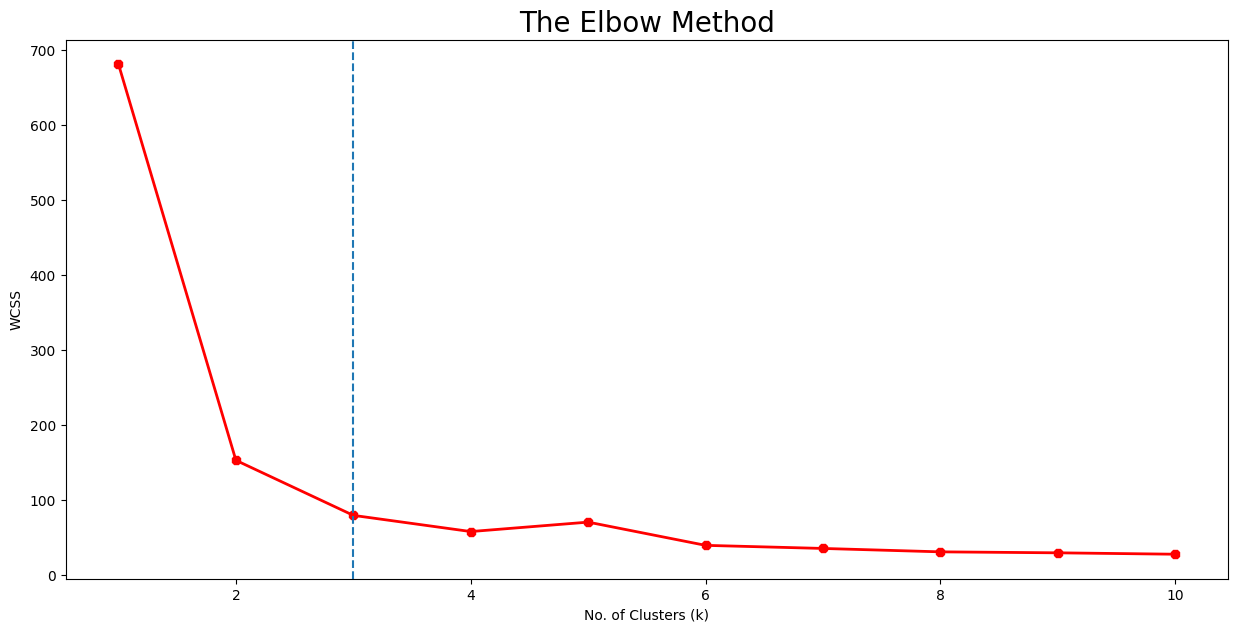

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

iris = pd.read_excel('data_iris.xlsx')
iris_x = iris.iloc[:, 1:5]
iris_x.head()

x_iris = np.array(iris_x)
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x_iris)
x_scaled

wcss=[]
for i in range(1,11):
    km = KMeans(i)
    km.fit(iris_x)
    wcss.append(km.inertia_)
np.array(wcss)

fig, ax = plt.subplots(figsize=(15,7))
ax = plt.plot(range(1,11),wcss, linewidth=2, color="red", marker ="8")
plt.axvline(x=3, ls='--')
plt.ylabel('WCSS')
plt.xlabel('No. of Clusters (k)')
plt.title('The Elbow Method', fontsize = 20)
plt.show()

* Berdasarkan metode Elbow, jumlah klaster optimal adalah K = 3, karena pada titik ini terjadi penurunan WCSS (Within-Cluster Sum of Squares) yang signifikan sebelum grafik mulai melandai.

# Fuzzy C-mean

## Konsep Fuzzy C-mean  
Fuzzy C-Means merupakan algoritma yang termasuk dalam kategori soft clustering, di mana setiap data dapat menjadi anggota dari lebih dari satu klaster secara bersamaan. Berbeda dengan hard clustering yang hanya menetapkan satu klaster untuk setiap data, Fuzzy C-Means menghitung derajat keanggotaan (membership value) dari setiap data terhadap seluruh klaster, dengan nilai antara 0 hingga 1. Penentuan klaster utama untuk suatu data dilakukan berdasarkan nilai derajat keanggotaan tertinggi. Pada tahap inisialisasi, jumlah total derajat keanggotaan dari satu data terhadap seluruh klaster adalah 1, yang mencerminkan distribusi keanggotaannya di semua klaster.


## Langkah-langkah  
1. Tentukan jumlah klaster $C$, nilai fuzzifier $m$, dan inisialisasi nilai derajat keanggotaan awal secara acak dimana jumlah semua nilai keanggotaan untuk satu baris data terhadap seluruh klaster harus sama dengan 1.  

2. Hitung pusat setiap klaster  
* Rumus :  
$$v_i = \frac{\sum_{k=1}^{n} u_{ik}^m x_k}{\sum_{k=1}^{n} u_{ik}^m}$$  

* Penjelasan :  
$v_{i}$ : pusat klaster ke-i (centroid).  
$u_{ik}$ : derajat keanggotaan data ke-k terhadap klaster ke-i.  
$m$ : nilai fuzzifier.  
$x_{k}$ : data ke-k.  
$n$ : jumlah total data.  

3. Hitung jarak titik setiap data dari centroid menggunakan rumus Euclidian distance karena dibutuhkan untuk perhitungan update derajat keanggotaan.

* Rumus :  
$$d(A, B) = \sqrt{ \sum_{i=1}^{n} (x_i - y_i)^2 }$$  

* Penjelasan :  
$d(A,B)$ :  jarak antara vektor $A$ dan $B$.
$x_{i}, y_{i}$ : komponen ke-$i$ dari masing-masing vektor.  
$n$ : jumlah total data.  

4. Update derajat keanggotaan  
* Rumus :  
$$u_{ik} = \frac{1}{\sum_{j=1}^{c} \left( \frac{\lVert x_k - v_i \rVert}{\lVert x_k - v_j \rVert} \right)^{\frac{2}{m-1}}}
$$  

* Penjelasan :  
$u_{ik}$ : derajat keanggotaan data ke-k terhadap klaster ke-i.  
$x_{k}$ : data ke-k.  
$v_{i},v_{j}$ : pusat klaster ke-i dan ke-j  
$||.||$ : jarak Euclidean antara titik dan pusat klaster.  
$m$ : nilai fuzzifier.  
$c$ : jumlah klaster.  

* Jika $m$ = 2, maka pangkatnya bisa menjadi 2.
* Misalnya hitung $u_{11}$, artinya hitung derajat keanggotaan data ke 1 pada klaster 1.

5. Ulangi langkah 2 hingga 4 secara iteratif hingga mencapai kondisi konvergen, yaitu ketika perubahan yang terjadi pada nilai pusat klaster atau derajat keanggotaan antar iterasi sangat kecil atau tidak signifikan lagi. Pada titik ini, proses klasterisasi dianggap telah mencapai hasil yang optimal.  

6. Cek Konvergensi dengan fungsi objektif dengan membandingkan nilai fungsi objektif pada dua iterasi berurutan.  

* Rumus :  
$$J_m = \sum_{k=1}^{n} \sum_{i=1}^{c} u_{ik}^m \cdot \|x_k - v_i\|^2$$  

* Penjelasan :  
$u_{ik}$ : derajat keanggotaan data ke-k terhadap klaster ke-i.  
$m$ : nilai fuzzifier.  
$x_{k}$ : data ke-k.  
$v_{i}$ : pusat klaster ke-i (centroid).  
$||x_{k}-v_{i}||$: jarak (umumnya menggunakan euclidean distance)  

* Jika selisih dari dua iterasi berturut-turut lebih kecil dari batas toleransi misalnya 0,00001, maka dianggap sudah konvergen dan iterasi berhenti.

7. Menentukan klaster terakhir setelah proses iterasi selesai (konvergen), maka selanjutnya mengklasifikasi setiap data pada suatu klaster dengan cara: menentukan kluster dengan nilai $u_{ij}$ tertinggi untuk data tersebut. Misalnya untuk data $x_{i}$ diperoleh derajat keanggotaan :  
* $u_{11}$ = 0,2  
* $u_{21}$ = 0,7  
* $u_{31}$ = 0,1  

Maka kluster utama untuk $x_{1}$ adalah kluster ke-2, karena $u_{21}$ adalah yang terbesar.





## Komputasi Fuzzy C-mean  
* m = 2  
* maksimal iterasi = 100  
* epsilon (batas toleransi) = 0,00001  


In [ ]:
import numpy as np

# Data xi
X = np.array([
    [1, 2],
    [2, 3],
    [3, 4],
    [6, 7],
    [7, 8]
])

# Matriks keanggotaan awal U (acak)
U = np.array([
    [0.5, 0.5],
    [0.7, 0.3],
    [0.8, 0.2],
    [0.7, 0.3],
    [0.6, 0.4]
])

# Parameter
m = 2            # Fuzziness
max_iter = 100  # Maksimum iterasi
epsilon = 1e-5  # Toleransi konvergensi 0.00001

def calculate_centroids(U, X, m):
    um = U ** m
    return (um.T @ X) / np.sum(um.T, axis=1)[:, None]

def update_membership(X, centroids, m):
    n, c = X.shape[0], centroids.shape[0]
    U_new = np.zeros((n, c))
    for i in range(n):
        for j in range(c):
            num = np.linalg.norm(X[i] - centroids[j])
            denom = sum((num / np.linalg.norm(X[i] - centroids[k])) ** (2/(m-1))
                        for k in range(c))
            U_new[i, j] = 1 / denom
    return U_new

def calculate_objective_function(U, X, centroids, m):
    return sum((U[i,j]**m) * np.linalg.norm(X[i] - centroids[j])**2
               for i in range(X.shape[0])
               for j in range(centroids.shape[0]))

# Iterasi Fuzzy C-Means dengan detail output
prev_obj = None
for iteration in range(1, max_iter+1):
    centroids = calculate_centroids(U, X, m)
    U = update_membership(X, centroids, m)
    obj = calculate_objective_function(U, X, centroids, m)

    # Cetak detail iterasi
    print(f"--- Iterasi {iteration} ---")
    print("Centroids:")
    print(np.round(centroids, 4))
    print("Objektif J_m:", round(obj, 6))
    print("Keanggotaan U:")
    print(np.round(U, 4))
    print()

    # Cek konvergensi
    if prev_obj is not None and abs(obj - prev_obj) < epsilon:
        print(f"Konvergen pada iterasi ke-{iteration} (ΔJ = {abs(obj - prev_obj):.6f} < {epsilon})")
        break

    prev_obj = obj
else:
    print("Maksimum iterasi tercapai tanpa konvergensi.")

# Hasil akhir (jika belum tercetak oleh break)
if abs(obj - prev_obj) >= epsilon:
    print("\n=== Hasil Akhir ===")
    print("Centroids Akhir:")
    print(np.round(centroids, 4))
    print("Keanggotaan Akhir (U):")
    print(np.round(U, 4))
    print("Nilai Fungsi Objektif Akhir:", round(obj, 6))

--- Iterasi 1 ---
Centroids:
[[3.861  4.861 ]
 [3.5079 4.5079]]
Objektif J_m: 26.410066
Keanggotaan U:
[[0.4345 0.5655]
 [0.3963 0.6037]
 [0.2582 0.7418]
 [0.5758 0.4242]
 [0.5531 0.4469]]

--- Iterasi 2 ---
Centroids:
[[4.6034 5.6034]
 [3.2074 4.2074]]
Objektif J_m: 20.900504
Keanggotaan U:
[[0.2729 0.7271]
 [0.177  0.823 ]
 [0.0165 0.9835]
 [0.7999 0.2001]
 [0.7146 0.2854]]

--- Iterasi 3 ---
Centroids:
[[6.0097 7.0097]
 [2.4384 3.4384]]
Objektif J_m: 6.68533
Keanggotaan U:
[[0.0762 0.9238]
 [0.0118 0.9882]
 [0.0337 0.9663]
 [1.     0.    ]
 [0.955  0.045 ]]

--- Iterasi 4 ---
Centroids:
[[6.4581 7.4581]
 [2.0327 3.0327]]
Objektif J_m: 4.791511
Keanggotaan U:
[[3.460e-02 9.654e-01]
 [1.000e-04 9.999e-01]
 [7.260e-02 9.274e-01]
 [9.868e-01 1.320e-02]
 [9.882e-01 1.180e-02]]

--- Iterasi 5 ---
Centroids:
[[6.4879 7.4879]
 [1.9747 2.9747]]
Objektif J_m: 4.766811
Keanggotaan U:
[[0.0306 0.9694]
 [0.     1.    ]
 [0.0795 0.9205]
 [0.9855 0.0145]
 [0.9897 0.0103]]

--- Iterasi 6 ---
Centro

Link perhitungan manual hanya sampai dua iterasi :  
https://docs.google.com/spreadsheets/d/1wLilhPFjf0tFwQjRFbflKhPWY88ZvvkZ3B9bXPkLoxw/edit?usp=sharing

## Implementasi data iris 3 klaster  
* n_cluster = 3  
* m = 2  
* epsilon = 0,00001
* maksimal iterasi = 150

In [4]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from fcmeans import FCM
from sklearn.metrics import silhouette_score, accuracy_score, confusion_matrix
from scipy.spatial.distance import cdist

# 1. Baca dan siapkan data
df = pd.read_excel("class.xlsx")  
df['id'] = df.index + 1
X = df[['petal_length', 'petal_width', 'sepal_length', 'sepal_width']].values

# 2. Normalisasi Min–Max
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# 3. Fuzzy C-Means clustering
n_clusters = 3
m = 2
epsilon = 1e-5
fcm = FCM(n_clusters=n_clusters, m=m, error=epsilon, max_iter=150, random_state=42)
fcm.fit(X_scaled)

# 4. Hasil prediksi
labels = fcm.predict(X_scaled)
U = fcm.u
centers = fcm.centers
df['cluster'] = labels

# 5. Silhouette Score
sil_score = silhouette_score(X_scaled, labels)
print(f"Silhouette Score: {sil_score:.4f}")

# 6. Inertia (dengan label keras)
inertia = np.sum((X_scaled - centers[labels])**2)
print(f"Inertia (crisp): {inertia:.4f}")

# 7. Fungsi Objektif J_m
dist_matrix = cdist(X_scaled, centers, metric='euclidean')
Jm = np.sum((U**m) * (dist_matrix**2))
print(f"FCM Objective J_m: {Jm:.4f}")

# 8. Gabungkan hasil ke DataFrame
result_df = pd.DataFrame({
    'id': df['id'],
    'cluster': df['cluster']  # ← Tambahkan ini
})
for j in range(n_clusters):
    result_df[f'membership_cluster_{j}'] = np.round(U[:, j], 4)

print(f"\n--- Hasil Clustering (epsilon: {epsilon}) ---")
print(result_df.to_string(index=False))


# 9. Mapping cluster ke class mayoritas
mapping = (
    df.groupby('cluster')['class']
      .agg(lambda x: x.mode()[0])
      .to_dict()
)
df['predicted_class'] = df['cluster'].map(mapping)

# 10. Evaluasi
y_true   = df['class']
y_pred   = df['predicted_class']
classes  = sorted(df['class'].unique())
cm       = confusion_matrix(y_true, y_pred, labels=classes)

# Akurasi keseluruhan
acc = accuracy_score(y_true, y_pred)
print(f"\nAkurasi keseluruhan clustering terhadap label asli: {acc:.4%}")

# Persentase error per kelas
error_per_class = {}
for i, c in enumerate(classes):
    total   = cm[i].sum()
    correct = cm[i, i]
    error   = 1 - correct/total if total > 0 else 0
    error_per_class[c] = error

print("\nPersentase kesalahan per kelas:")
for c, e in error_per_class.items():
    print(f" - {c}: {e:.2%}")

# Distribusi cluster per kelas (insight)
dist = pd.crosstab(df['class'], df['cluster'], 
                   rownames=['Class'], colnames=['Cluster'])
print("\nDistribusi cluster per kelas:")
print(dist)

# Simpan hasil lengkap ke Excel
df.to_excel("hasil_fuzzy.xlsx", index=False)

# Tampilkan perbandingan class vs cluster vs predicted_class
pd.set_option('display.max_rows', None)
print("\nPerbandingan lengkap:")
print(df[['class', 'cluster', 'predicted_class']])

Silhouette Score: 0.4955
Inertia (crisp): 7.0830
FCM Objective J_m: 5.2330

--- Hasil Clustering (epsilon: 1e-05) ---
 id  cluster  membership_cluster_0  membership_cluster_1  membership_cluster_2
  1        0                0.9930                0.0023                0.0048
  2        0                0.9313                0.0204                0.0483
  3        0                0.9660                0.0105                0.0235
  4        0                0.9371                0.0191                0.0439
  5        0                0.9839                0.0053                0.0108
  6        0                0.8700                0.0450                0.0850
  7        0                0.9711                0.0091                0.0198
  8        0                0.9989                0.0003                0.0008
  9        0                0.8635                0.0413                0.0952
 10        0                0.9534                0.0141                0.0325
 11        0 